<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [33]:
# Paquetes necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score


---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [2]:

#El link de la data
url_data = "https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data"

# Los nombres de las variables/columnas
nombres_columnas = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# ¡A importar! Cargo el archivo en un 'DataFrame' (una tabla super útil)
try:
    df_casas_boston = pd.read_csv(
        url_data,
        delim_whitespace=True,
        names=nombres_columnas,
        header=None
    )

    print("Comprobamos que la data se haya importado correctamente:")
    print(df_casas_boston.head())
except Exception as e:
    print(f"Hubo un error al cargar la data: {e}")

/tmp/ipython-input-2798528337.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_casas_boston = pd.read_csv(


Comprobamos que la data se haya importado correctamente:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
print("Número, nombres y tipo de los atributos:")
print(f"Número de atributos: {len(df_casas_boston.columns)}")
print(f"Nombres de los atributos: {df_casas_boston.columns.tolist()}\n")
print("Tipos de datos de cada variable:")
print(df_casas_boston.dtypes)

print("Verificación de valores faltantes (missing values) por columna:")
missing_values = df_casas_boston.isnull().sum()
missing_values = missing_values[missing_values > 0]

if not missing_values.empty:
    print(missing_values)
else:
    print("No se encontraron valores faltantes en ninguna columna.")

Número, nombres y tipo de los atributos:
Número de atributos: 14
Nombres de los atributos: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Tipos de datos de cada variable:
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
Verificación de valores faltantes (missing values) por columna:
No se encontraron valores faltantes en ninguna columna.


Como se puede apreciar en el anterior bloque de código la información ha sido importada correctamente, el nombre de la variable y su tipo corresponden a la data, y no existen NA´s por corregir.

---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>



Análisis de la variable categórica 'CHAS':

Frecuencia de 'CHAS':
CHAS
0    471
1     35
Name: count, dtype: int64


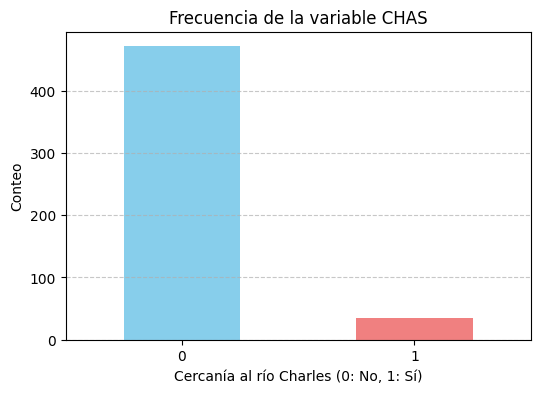


Estadísticas descriptivas para variables numéricas:
             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.455534  

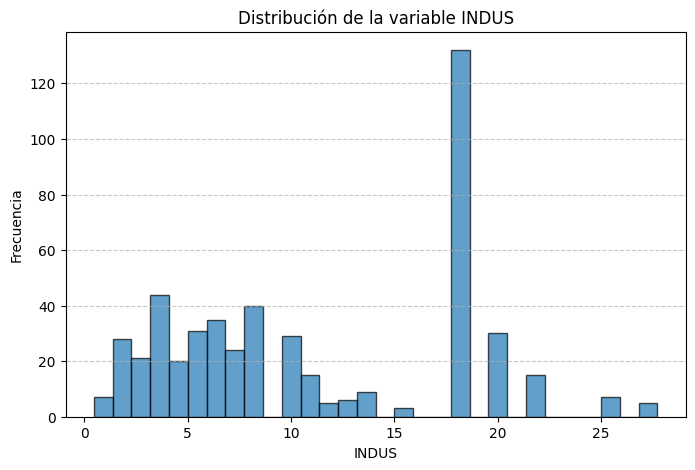

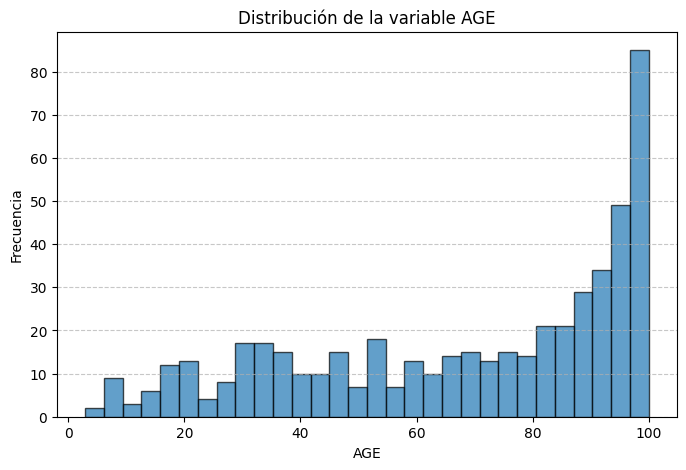

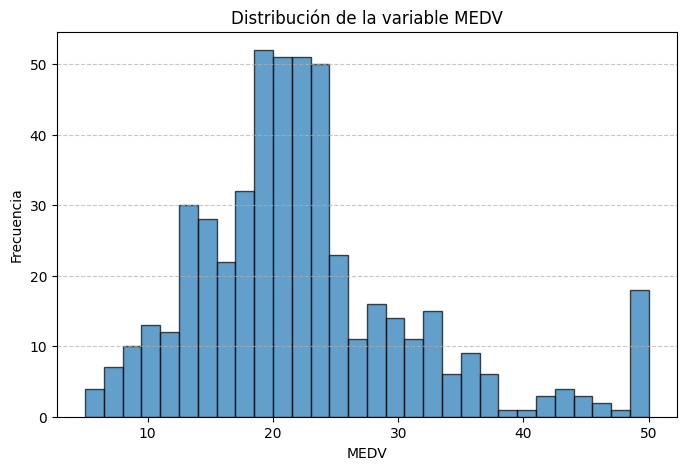

In [4]:
# --- Análisis de la Variable Categórica: CHAS ---

print("\nAnálisis de la variable categórica 'CHAS':")
frecuencia_chas = df_casas_boston['CHAS'].value_counts()
print("\nFrecuencia de 'CHAS':")
print(frecuencia_chas)

plt.figure(figsize=(6, 4))
frecuencia_chas.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Frecuencia de la variable CHAS')
plt.xlabel('Cercanía al río Charles (0: No, 1: Sí)')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Análisis de Variables Numéricas ---

columnas_numericas = df_casas_boston.select_dtypes(include=np.number).columns.tolist()
if 'CHAS' in columnas_numericas:
    columnas_numericas.remove('CHAS')

print("\nEstadísticas descriptivas para variables numéricas:")
print(df_casas_boston[columnas_numericas].describe())

# 2. Realiza un histograma solo para INDUS, AGE y MEDV
print("\nHistogramas de variables seleccionadas (INDUS, AGE, MEDV):")
variables_histogramas = ['INDUS', 'AGE', 'MEDV']

for col in variables_histogramas:
    plt.figure(figsize=(8, 5))
    plt.hist(df_casas_boston[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribución de la variable {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

1. Variables con Dispersión Extrema (Outliers)Las variables CRIM (tasa de crimen) y ZN (terreno residencial grande) son las que presentan mayor dispersión y sesgo. En CRIM, la media de $3.61$ es muy inferior al valor máximo de $88.98$, y su alta desviación estándar ($8.60$) confirma una distribución muy sesgada a la derecha, indicando que la mayoría de los barrios tienen crimen bajo en general y unos pocos tienen tasas altas de crimen. Similarmente, ZN tiene una mediana de $0.00$, lo que significa que la mayoría de los distritos no tienen grandes lotes residenciales, mientras que el máximo de $100.00$ señala que la característica es exclusiva de áreas especificas.

2. Variables Concentradas y ConsistentesOtras variables, como PTRATIO (ratio alumno-profesor), NOX (contaminación) y RM (habitaciones promedio), muestran una distribución mucho más concentrada y son relativamente homogéneas.

3. Variables de Segmentación y AntigüedadLas variables AGE (antigüedad de las viviendas) y LSTAT (estatus socioeconómico bajo) son importantes para la segmentación social del dataset ya que nos comunican información denográfica relevante para entender la condición de vida de las personas que viven en Boston.

### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

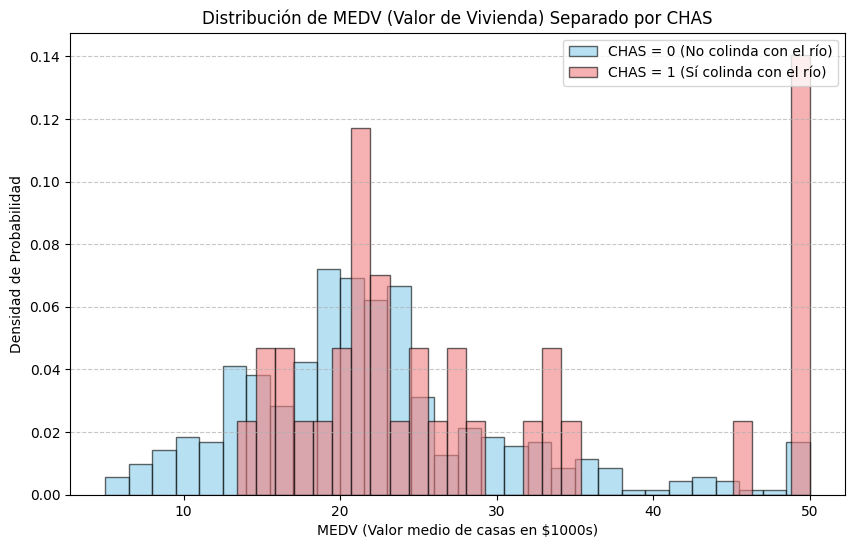

In [5]:
medv_chas_0 = df_casas_boston[df_casas_boston['CHAS'] == 0]['MEDV']
medv_chas_1 = df_casas_boston[df_casas_boston['CHAS'] == 1]['MEDV']

plt.figure(figsize=(10, 6))

plt.hist(
    medv_chas_0,
    bins=30,
    density=True,
    alpha=0.6,
    label='CHAS = 0 (No colinda con el río)',
    color='skyblue',
    edgecolor='black'
)

plt.hist(
    medv_chas_1,
    bins=30,
    density=True,
    alpha=0.6,
    label='CHAS = 1 (Sí colinda con el río)',
    color='lightcoral',
    edgecolor='black'
)

plt.title('Distribución de MEDV (Valor de Vivienda) Separado por CHAS')
plt.xlabel('MEDV (Valor medio de casas en $1000s)')
plt.ylabel('Densidad de Probabilidad')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

A pesar de que la data para ambos valores de CHAS se distribuye por todo el histograma existe una clara diferencia entre los valores que toma MEDV cuando CHAS es igual a 0, aqui los valores tienden a ser menores lo que indica que existe una correlación donde si compras una casa que no colinda con el río esta valdra menos. Contrariamente, si se compra una casa cercanana al río esta tomará altos valores.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [6]:
# Asumiendo que df_casas_boston ya está cargado con las columnas correctas
columnas_numericas = df_casas_boston.select_dtypes(include=np.number).columns.tolist()
matriz_correlacion = df_casas_boston[columnas_numericas].corr()
correlacion_con_medv = matriz_correlacion['MEDV'].sort_values(ascending=False)
print(correlacion_con_medv)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


Generando el Pair Plot...


<Figure size 1500x1500 with 0 Axes>

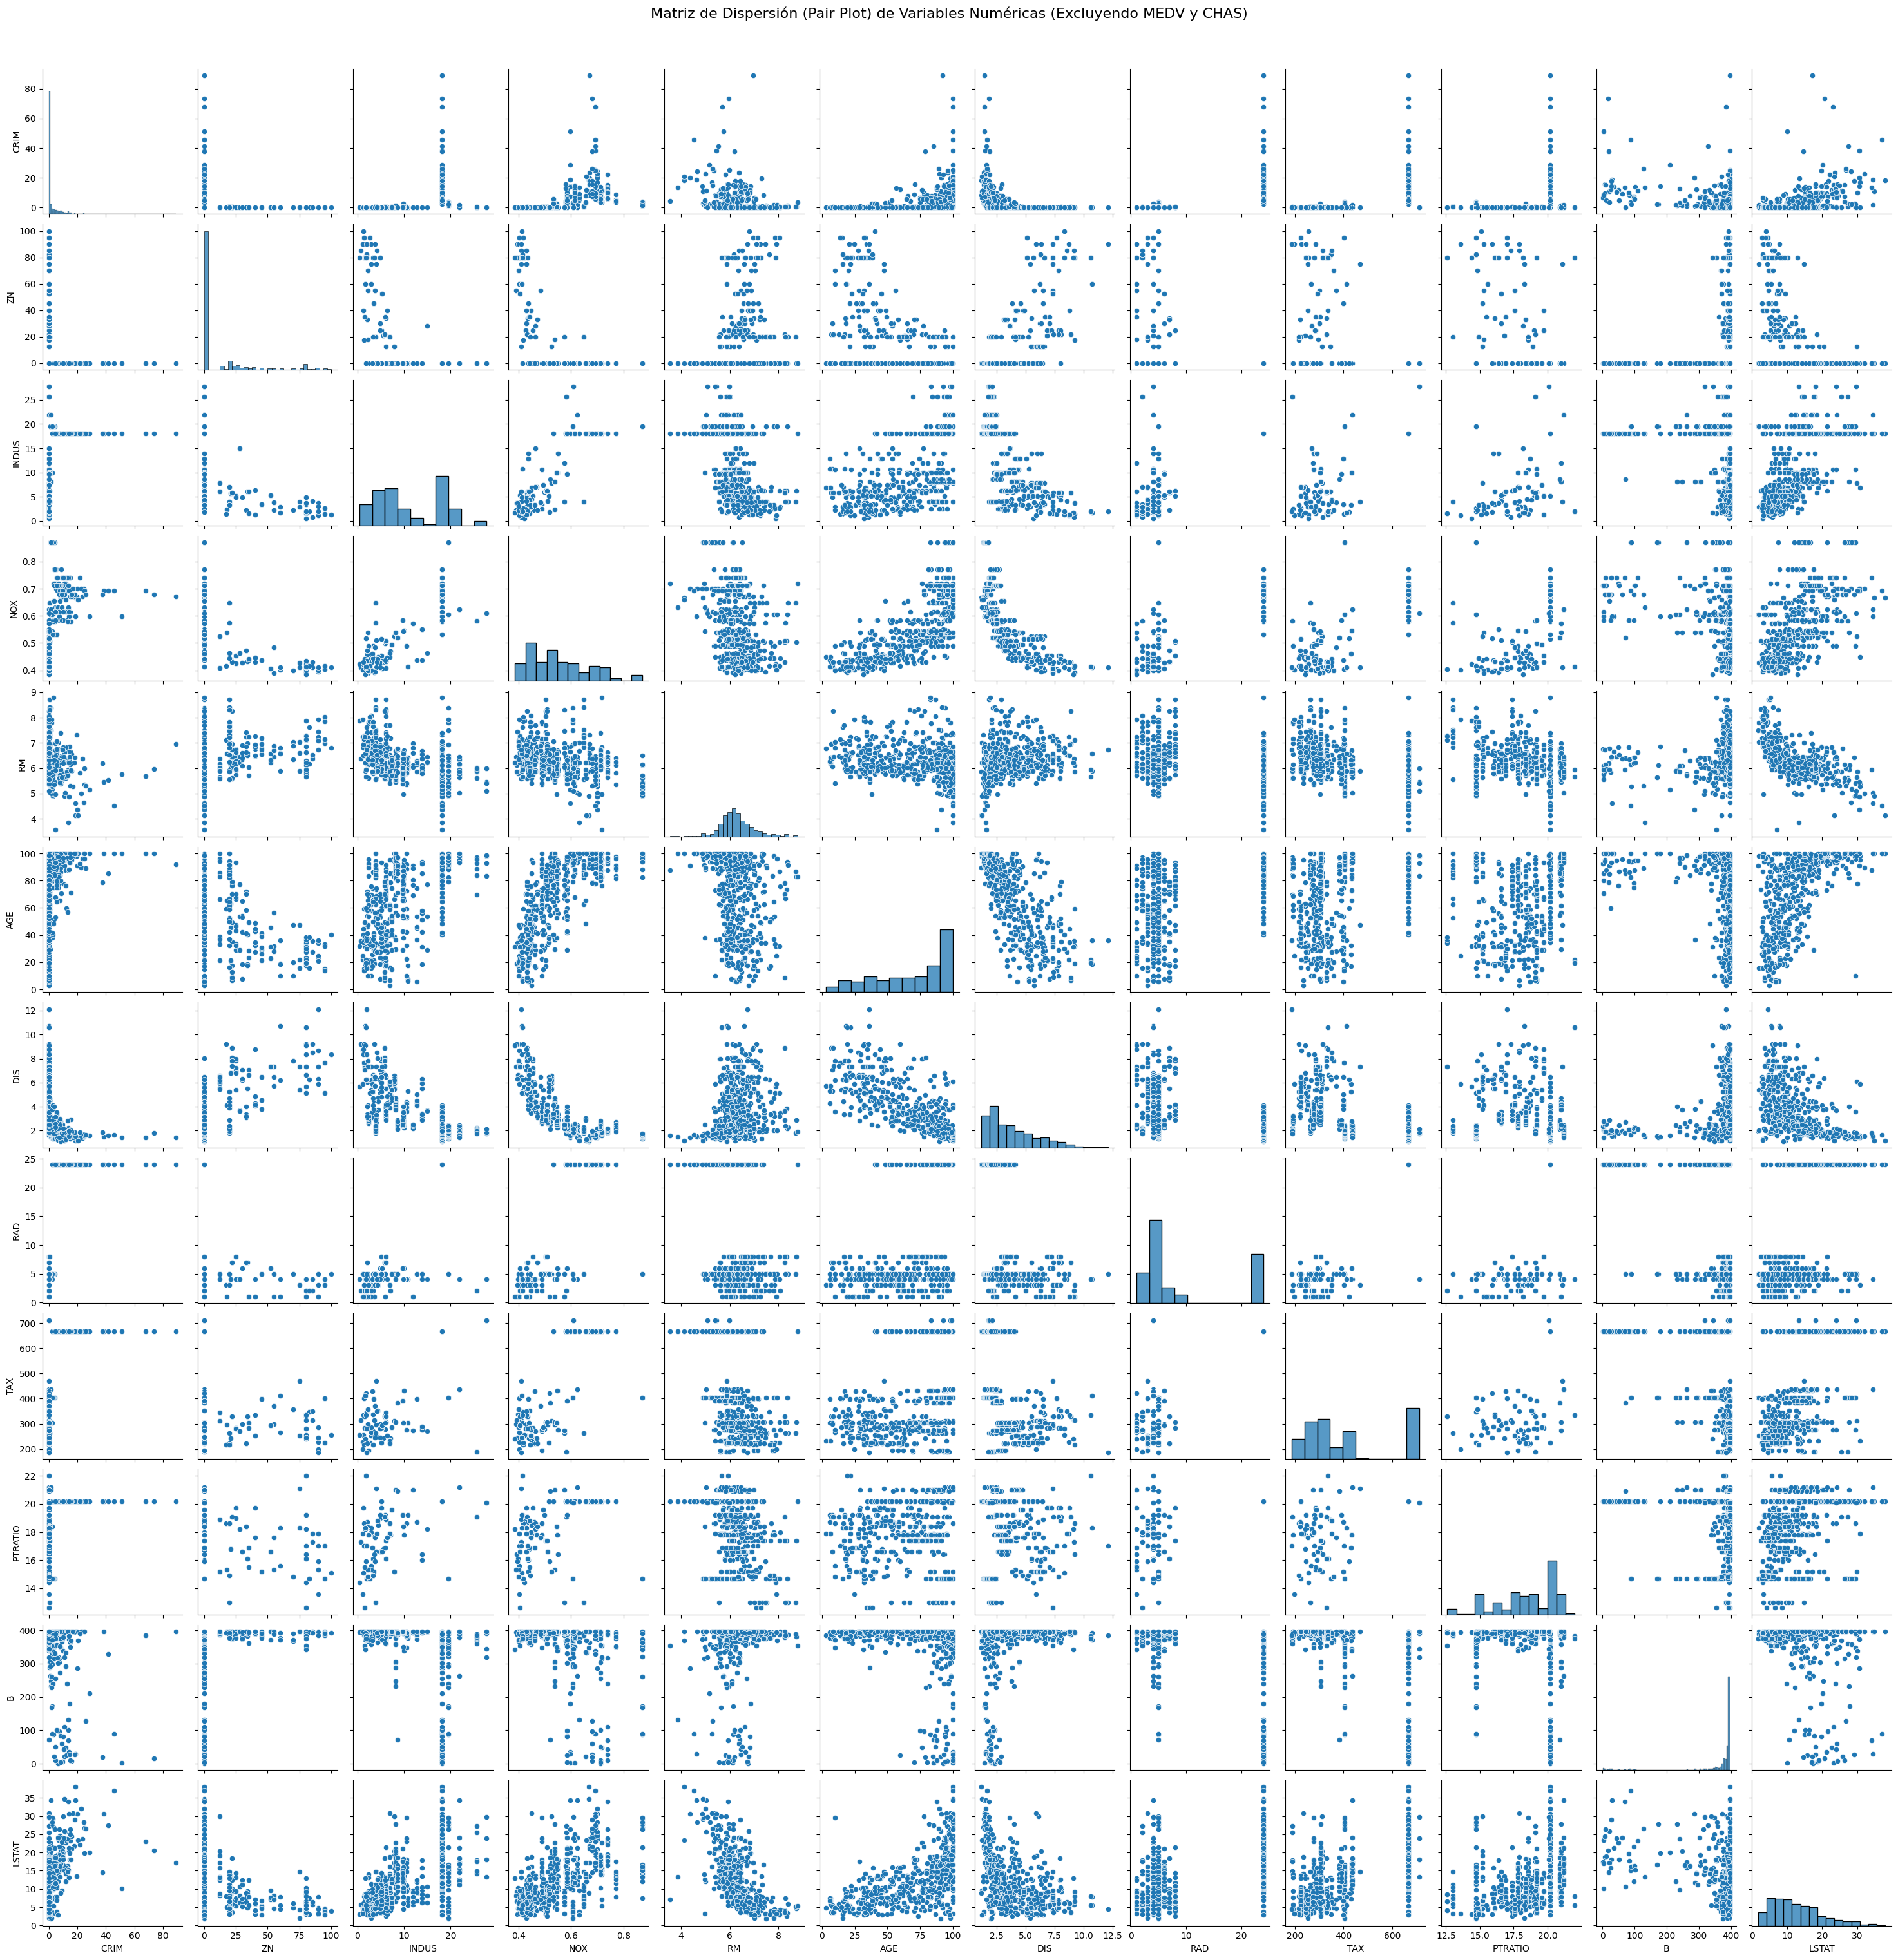

In [7]:
columnas_numericas = df_casas_boston.select_dtypes(include=np.number).columns.tolist()
variables_a_graficar = [col for col in columnas_numericas if col not in ['MEDV', 'CHAS']]

print("Generando el Pair Plot...")

plt.figure(figsize=(15, 15))

sns.pairplot(df_casas_boston, vars=variables_a_graficar, diag_kind='hist')

plt.suptitle('Matriz de Dispersión (Pair Plot) de Variables Numéricas (Excluyendo MEDV y CHAS)',
             y=1.02,
             fontsize=16)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


Matrix de correlación: MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64
Variables con correlación fuerte: ['LSTAT', 'RM']
Variables con correlación débil: ['DIS', 'CHAS']


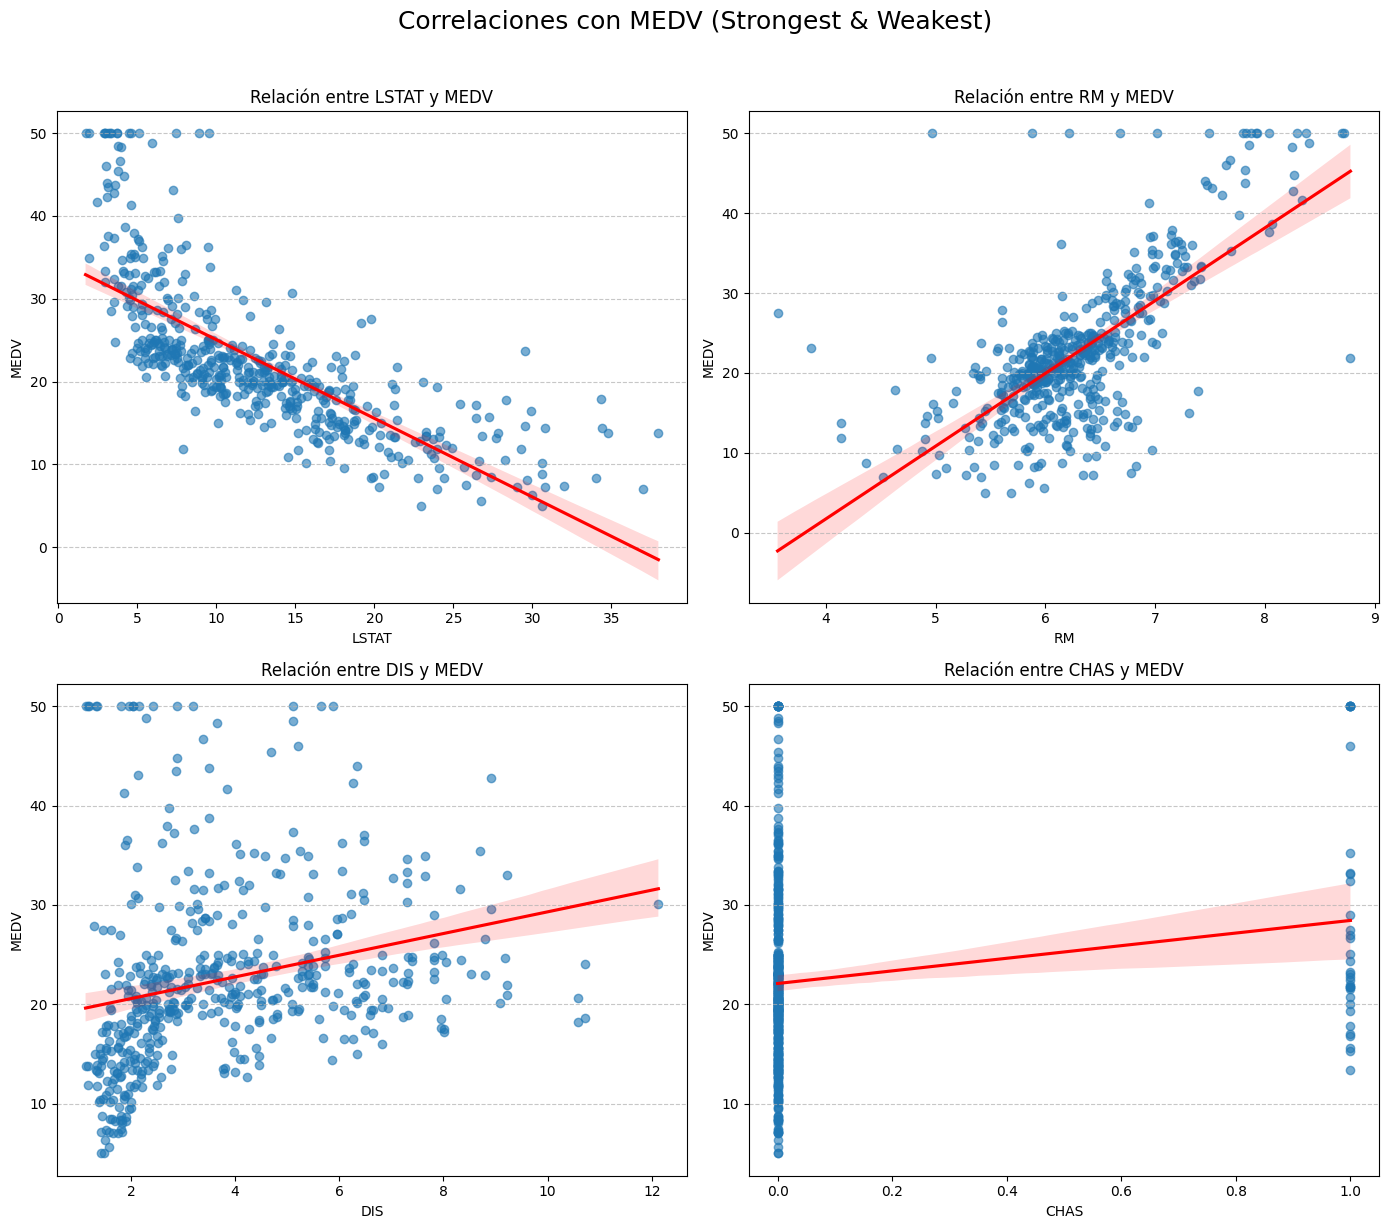

In [8]:
columnas_numericas = df_casas_boston.select_dtypes(include=np.number).columns.tolist()

matriz_correlacion = df_casas_boston[columnas_numericas].corr()
correlacion_abs = matriz_correlacion['MEDV'].abs().sort_values(ascending=False)
print(f"Matrix de correlación: {correlacion_abs}")
correlacion_abs = correlacion_abs.drop('MEDV')

variables_fuertes = correlacion_abs.head(2).index.tolist()
print(f"Variables con correlación fuerte: {variables_fuertes}")

variables_debiles = correlacion_abs.tail(2).index.tolist()
print(f"Variables con correlación débil: {variables_debiles}")

variables_a_graficar = variables_fuertes + variables_debiles

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(variables_a_graficar):
    sns.regplot(
        x=col,
        y='MEDV',
        data=df_casas_boston,
        ax=axes[i],
        scatter_kws={'alpha':0.6},
        line_kws={'color':'red'}
    )
    axes[i].set_title(f'Relación entre {col} y MEDV')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Correlaciones con MEDV (Strongest & Weakest)', y=1.02, fontsize=18)
plt.tight_layout()
plt.show()

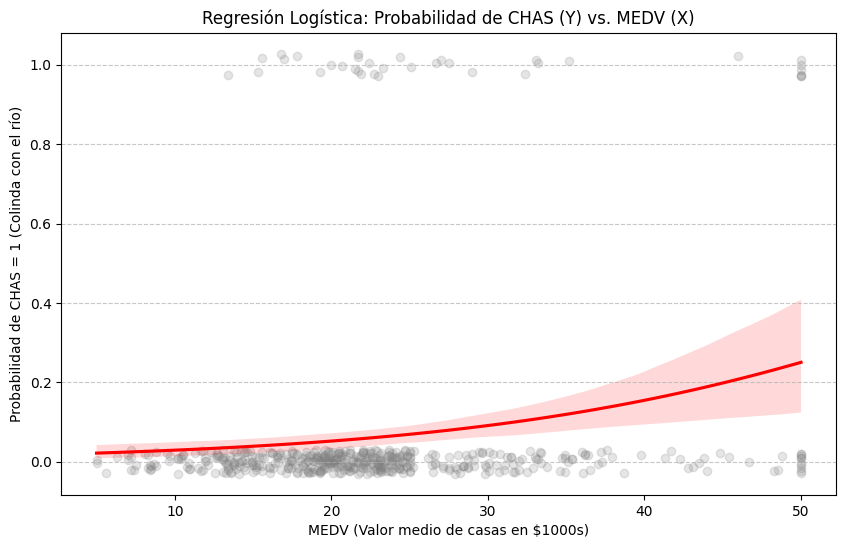

In [9]:
plt.figure(figsize=(10, 6))

# Usamos regplot con logistic=True para mostrar la curva de regresión logística
sns.regplot(
    x='MEDV',
    y='CHAS',
    data=df_casas_boston,
    logistic=True,
    n_boot=500, # Número de muestras para el cálculo (mayor precisión)
    y_jitter=.03, # Pequeña variación en y para visualizar mejor los puntos 0 y 1
    scatter_kws={'alpha': 0.2, 'color': 'gray'},
    line_kws={'color': 'red'}
)

plt.title('Regresión Logística: Probabilidad de CHAS (Y) vs. MEDV (X)')
plt.xlabel('MEDV (Valor medio de casas en $1000s)')
plt.ylabel('Probabilidad de CHAS = 1 (Colinda con el río)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


**Variables con Fuerte Correlación**

Las variables LSTAT y RM muestran la correlación más fuerte con el precio de la vivienda, lo cual es altamente consecuente con la economía inmobiliaria:

**LSTAT** (Porcentaje de población con estatus social más bajo): Esta variable presenta una fuerte correlación negativa (alrededor de −0.74) con MEDV. Este resultado tiene sentido económico, pues se espera que en las zonas con un mayor porcentaje de población de estatus socioeconómico bajo, el poder adquisitivo sea menor, reflejándose en precios de vivienda consistentemente más bajos.

**RM** (Número promedio de habitaciones por vivienda): Muestra una fuerte correlación positiva (cerca de +0.70) con MEDV. Esto es lógico, ya que un mayor número promedio de habitaciones implica, generalmente, mayores dimensiones de las propiedades, lo que incrementa directamente su costo en el mercado.

**Variables con Débil Correlación**

Las variables DIS y CHAS se identificaron con las correlaciones más débiles (según valor absoluto), indicando que su influencia en el precio final de la vivienda es marginal:

**DIS** (Distancias ponderadas a cinco centros de empleo de Boston): Su baja correlación (alrededor de +0.25) sugiere que, si bien la cercanía al lugar de trabajo puede ser una conveniencia, no es un factor determinante a gran escala para aumentar o disminuir la plusvalía de una propiedad, a diferencia de las condiciones intrínsecas del barrio o de la vivienda (como LSTAT o RM).

**CHAS** (Colindancia con el río Charles): A pesar de ser una característica atractiva, presenta la correlación más débil (cerca de +0.17). Aunque el análisis con regresión logística confirmó que la probabilidad de que una casa sea CHAS=1 aumenta con MEDV, su impacto lineal en la variación de precio es la más baja de todos los atributos.

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


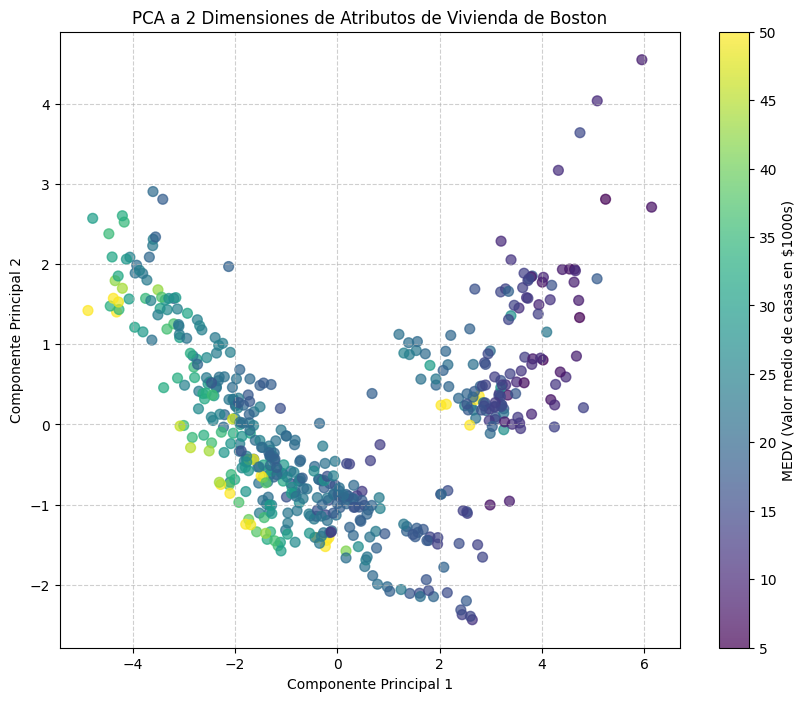


--- Varianza Explicada ---
Varianza Explicada por CP1: 0.51 (51.1%)
Varianza Explicada por CP2: 0.11 (11.2%)
Varianza Total Explicada por 2 CP: 0.62 (62.2%)


In [10]:
# Separamos la variable objetivo (y) y los atributos (X)
X = df_casas_boston.drop(columns=['MEDV'])
y = df_casas_boston['MEDV']

# Excluir la variable categórica 'CHAS' (ya que PCA requiere datos numéricos)
if 'CHAS' in X.columns:
    X = X.drop(columns=['CHAS'])

# Identificar las variables que realmente se usaron
variables_pca = X.columns.tolist()

# --- 2. Estandarización de los Atributos fundamentak al hacer un PCA ---

# Aplicamos StandardScaler a los datos X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 3. Aplicación de PCA ---

# Inicializamos el objeto PCA para reducir a 2 componentes
pca = PCA(n_components=2)

# Ajustamos y transformamos los datos
X_pca = pca.fit_transform(X_scaled)

# Creamos un nuevo DataFrame con las Componentes Principales
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Agregamos la variable objetivo MEDV al DataFrame PCA para la visualización
df_pca['MEDV'] = y.values

# --- 4. Generación del Gráfico (Scatter Plot) ---

plt.figure(figsize=(10, 8))

# Utilizamos el scatter plot, asignando el color (c) a la variable MEDV
scatter = plt.scatter(
    df_pca['Componente Principal 1'],
    df_pca['Componente Principal 2'],
    c=df_pca['MEDV'],          # El color se define por el valor de MEDV
    cmap='viridis',            # Mapa de colores para la escala
    s=50,                      # Tamaño de los puntos
    alpha=0.7
)

# Añadir la barra de color (Colorbar) para interpretar MEDV
cbar = plt.colorbar(scatter)
cbar.set_label('MEDV (Valor medio de casas en $1000s)')

plt.title('PCA a 2 Dimensiones de Atributos de Vivienda de Boston')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

# --- 5. Información Adicional ---

# Varianza Explicada
varianza_explicada = pca.explained_variance_ratio_
print("\n--- Varianza Explicada ---")
print(f"Varianza Explicada por CP1: {varianza_explicada[0]:.2f} ({varianza_explicada[0]*100:.1f}%)")
print(f"Varianza Explicada por CP2: {varianza_explicada[1]:.2f} ({varianza_explicada[1]*100:.1f}%)")
print(f"Varianza Total Explicada por 2 CP: {varianza_explicada.sum():.2f} ({varianza_explicada.sum()*100:.1f}%)")

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


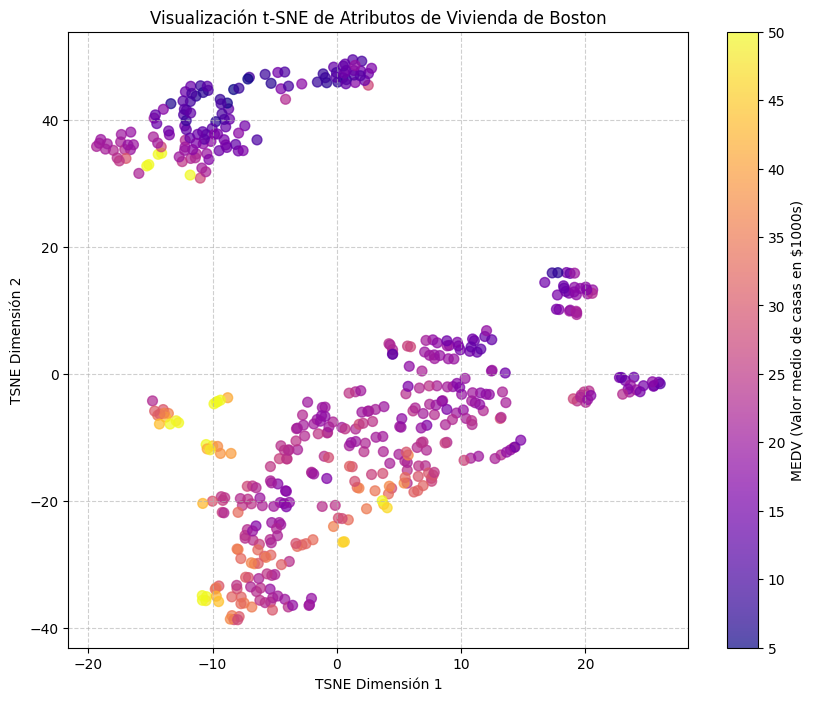

In [11]:
X = df_casas_boston.drop(columns=['MEDV'])
y = df_casas_boston['MEDV']

# Excluir la variable categórica 'CHAS'
if 'CHAS' in X.columns:
    X = X.drop(columns=['CHAS'])

# --- 2. Estandarización de los Atributos (Scaling) ---

# Aplicamos StandardScaler a los datos X.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# --- 3. Aplicación de t-SNE ---

# Inicializamos el objeto t-SNE
# Experimentando con:
# - n_components=2 (dimensiones de salida)
# - perplexity (sugerido entre 5 y 50, afecta la balanza entre vecinos locales y globales)
# - learning_rate (velocidad de aprendizaje)

tsne = TSNE(
    n_components=2,
    perplexity=30,  # Valor común para empezar
    learning_rate=200, # Valor común para empezar
    random_state=42, # Para reproducibilidad
    n_iter=1000 # Número de iteraciones
)

# Ajustamos y transformamos los datos
X_tsne = tsne.fit_transform(X_scaled)

# Creamos un nuevo DataFrame con las dos dimensiones TSNE
df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE Dimensión 1', 'TSNE Dimensión 2'])

# Agregamos la variable objetivo MEDV al DataFrame TSNE para la visualización
df_tsne['MEDV'] = y.values

# --- 4. Generación del Gráfico (Scatter Plot) ---

plt.figure(figsize=(10, 8))

# Utilizamos el scatter plot, asignando el color (c) a la variable MEDV
scatter = plt.scatter(
    df_tsne['TSNE Dimensión 1'],
    df_tsne['TSNE Dimensión 2'],
    c=df_tsne['MEDV'],          # El color se define por el valor de MEDV
    cmap='plasma',              # Mapa de colores
    s=50,                       # Tamaño de los puntos
    alpha=0.7
)

# Añadir la barra de color (Colorbar) para interpretar MEDV
cbar = plt.colorbar(scatter)
cbar.set_label('MEDV (Valor medio de casas en $1000s)')

plt.title('Visualización t-SNE de Atributos de Vivienda de Boston')
plt.xlabel('TSNE Dimensión 1')
plt.ylabel('TSNE Dimensión 2')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [12]:
X = df_casas_boston.drop(columns=['MEDV'])
y = df_casas_boston['MEDV']

if 'CHAS' in X.columns:
    X = X.drop(columns=['CHAS'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42,
    n_iter=1000
)

tsne.fit(X_scaled)

if hasattr(tsne, 'kl_divergence_'):
    kl_divergence_final = tsne.kl_divergence_
    print(f"Divergencia de Kullback-Leibler final: {kl_divergence_final:.4f}")
else:
    print("El valor de kl_divergence_ no está disponible en esta implementación o versión de Scikit-learn.")
    print("Recuerda que este valor se usa internamente para optimizar, pero no es la métrica principal de calidad de la visualización.")

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Divergencia de Kullback-Leibler final: 0.4661


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


Se decidio priorizar el **t-SNE** sobre el **PCA** denido a que  preferí preservar las **estructuras no lineales** inherentes a los datos de vivienda. Aunque PCA logró una retención lineal buena del $62\%$ de la varianza, el t-SNE, como algoritmo **no lineal** optimizado para la **visualización**, demostró una **mayor fidelidad** al mapear las relaciones de proximidad de los datos originales a dos dimensiones. El bajo valor de la **Divergencia de Kullback-Leibler** ($\text{0.4661}$) confirma que la visualización obtenida es una **representación precisa** de los *clusters*. Además, si se visualiza el gráfico de **t-SNE** se puede ntoar que los clusters estan mejor definidos que en **PCA**.

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [21]:
# Asumiendo que df_casas_boston ya está cargado.
X_all = df_casas_boston.drop(columns=['MEDV'])
y_medv = df_casas_boston['MEDV']
y_chas = df_casas_boston['CHAS']

numeric_features = X_all.columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

# PARTE A: REGRESIÓN LINEAL (Predecir MEDV)

print("---A. Regresión Lineal para Predecir MEDV ---")

X_reg = df_casas_boston.drop(columns=['MEDV', 'CHAS'])
y_reg = y_medv

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_reg.columns)
    ],
    remainder='passthrough'
)

model_reg = Pipeline(steps=[
    ('preprocessor', preprocessor_reg),
    ('regressor', LinearRegression())
])

cv_folds = 5

r2_scores = cross_val_score(
    model_reg,
    X_train_reg,
    y_train_reg,
    cv=cv_folds,
    scoring='r2'
)

mae_scores = -cross_val_score(
    model_reg,
    X_train_reg,
    y_train_reg,
    cv=cv_folds,
    scoring='neg_mean_absolute_error'
)

r2_mean = r2_scores.mean()
r2_std = r2_scores.std()

mae_mean = mae_scores.mean()
mae_std = mae_scores.std()

print("\n--- Resultados de Validación Cruzada (CV=5) ---")
print(f"\nCoeficiente de Determinación (R2):")
print(f"  Media: {r2_mean:.4f}")
print(f"  Desviación Estándar: {r2_std:.4f}")
print("\nError Absoluto Medio (MAE):")
print(f"  Media: {mae_mean:.4f} ($1000s)")
print(f"  Desviación Estándar: {mae_std:.4f}")

# PARTE B: K-MEANS (Evaluar CHAS)
print("\n" + "="*50)
print("\n--- B. K-Means para Agrupar (Evaluar CHAS) ---")

X_cluster = X_all

X_scaled_all = preprocessor.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

cluster_labels = kmeans.fit_predict(X_scaled_all)

accuracy_ari = adjusted_rand_score(y_chas, cluster_labels)

print(f"\nEtiquetas Reales (CHAS): {y_chas.nunique()} clases.")
print(f"Clustering K-Means realizado con {kmeans.n_clusters} clusters.")
print(f"\nPrecisión del Clustering (Adjusted Rand Index - ARI): {accuracy_ari:.4f}")

---A. Regresión Lineal para Predecir MEDV ---

--- Resultados de Validación Cruzada (CV=5) ---

Coeficiente de Determinación (R2):
  Media: 0.7206
  Desviación Estándar: 0.0630

Error Absoluto Medio (MAE):
  Media: 3.4404 ($1000s)
  Desviación Estándar: 0.2340


--- B. K-Means para Agrupar (Evaluar CHAS) ---

Etiquetas Reales (CHAS): 2 clases.
Clustering K-Means realizado con 2 clusters.

Precisión del Clustering (Adjusted Rand Index - ARI): -0.0016


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [24]:
X_original = df_casas_boston.drop(columns=['MEDV', 'CHAS'])
y_medv = df_casas_boston['MEDV']
y_chas = df_casas_boston['CHAS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X = pd.DataFrame(data=X_pca, columns=['CP1', 'CP2'])

# PARTE A: REGRESIÓN LINEAL (Predecir MEDV) con PCA 2D

X_train, X_test, y_train, y_test = train_test_split(X, y_medv, test_size=0.2, random_state=42)

model = LinearRegression()
cv_folds = 5

r2_scores = cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv_folds,
    scoring='r2'
)

mae_scores = -cross_val_score(
    model,
    X_train,
    y_train,
    cv=cv_folds,
    scoring='neg_mean_absolute_error'
)

r2_mean = r2_scores.mean()
r2_std = r2_scores.std()

mae_mean = mae_scores.mean()
mae_std = mae_scores.std()

print("Resultados de Validación Cruzada (Regresión Lineal con PCA 2D)")
print(f"\nCoeficiente de Determinación (R2):")
print(f"  Media: {r2_mean:.4f}")
print(f"  Desviación Estándar: {r2_std:.4f}")
print("\nError Absoluto Medio (MAE):")
print(f"  Media: {mae_mean:.4f} ($1000s)")
print(f"  Desviación Estándar: {mae_std:.4f}")

# PARTE B: K-MEANS (Evaluar CHAS) con PCA 2D

print("\n" + "="*50)
print("\nK-Means para Agrupar (Evaluar CHAS) con PCA 2D")

X_cluster = X_pca

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

cluster_labels = kmeans.fit_predict(X_cluster)

accuracy_ari = adjusted_rand_score(y_chas, cluster_labels)

print(f"\nClustering K-Means realizado sobre 2 Componentes Principales.")
print(f"\nPrecisión del Clustering (Adjusted Rand Index - ARI): {accuracy_ari:.4f}")

Resultados de Validación Cruzada (Regresión Lineal con PCA 2D)

Coeficiente de Determinación (R2):
  Media: 0.3599
  Desviación Estándar: 0.0663

Error Absoluto Medio (MAE):
  Media: 5.2448 ($1000s)
  Desviación Estándar: 0.3887


K-Means para Agrupar (Evaluar CHAS) con PCA 2D

Clustering K-Means realizado sobre 2 Componentes Principales.

Precisión del Clustering (Adjusted Rand Index - ARI): -0.0016


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


La mejor opción para trabajar con tu modelo de predicción $\text{MEDV}$ es el **Modelo de Regresión Lineal entrenado con el conjunto de datos original (12 atributos)**, ya que alcanzó el mayor rendimiento predictivo con una **Media $\text{R}^2$ de $\mathbf{0.7206}$** y el menor error promedio ($\text{MAE}=3.44$ mil USD). La reducción de dimensionalidad mediante PCA a solo 2 Componentes Principales redujo drásticamente la capacidad explicativa del modelo a $\text{R}^2 = 0.3599$. Por otro lado, la variable $\text{CHAS}$ no es adecuada para el análisis de *clustering* con K-Means, pues el modelo fracasa en ambas versiones (con $\text{ARI} = -0.0016$), indicando que los atributos numéricos no logran distinguir de forma inherente a las casas que colindan con el río.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [26]:
# Definición del dataset (igual que en el mejor modelo A)
X = df_casas_boston.drop(columns=['MEDV', 'CHAS'])
y = df_casas_boston['MEDV']

# Separación Train/Test (usando el mismo random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición del Pipeline (Modelo A: Original con Scaling)
numeric_features = X.columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ],
    remainder='passthrough'
)

best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# --- 2. Entrenamiento Final y Predicción ---

# Entrenar el modelo final con TODO el conjunto de entrenamiento (X_train)
best_model.fit(X_train, y_train)

# Generar predicciones sobre el conjunto de test
y_pred = best_model.predict(X_test)

# --- 3. Cálculo de Precisión sobre el Test Set ---

# Coeficiente de Determinación (R2)
r2_test = r2_score(y_test, y_pred)

# Error Absoluto Medio (MAE)
mae_test = mean_absolute_error(y_test, y_pred)

# --- 4. Mostrar Resultados ---
print("Evaluación Final sobre el Conjunto de Test")
print(f"\nModelo Usado: Regresión Lineal (12 Atributos Originales)")
print(f"Número de Muestras de Test: {len(X_test)}")

print("\nMétricas de Precisión:")
print(f"  R2 (Coeficiente de Determinación): {r2_test:.4f}")
print(f"  MAE (Error Absoluto Medio): {mae_test:.4f} ($1000s)")

Evaluación Final sobre el Conjunto de Test

Modelo Usado: Regresión Lineal (12 Atributos Originales)
Número de Muestras de Test: 102

Métricas de Precisión:
  R2 (Coeficiente de Determinación): 0.6641
  MAE (Error Absoluto Medio): 3.2372 ($1000s)


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Para explicar la calidad del modelo a diferentes audiencias, se usarían métricas distintas: al **ejecutivo de la inmobiliaria** se le explicaría con el **MAE (Error Absoluto Medio)**, ya que este se expresa en **unidades monetarias concretas** (\$3,237.20), un lenguaje directo y accionable que comunica el **error promedio en dólares** que debe esperar la empresa por cada predicción de precio realizada. En cambio, al **analista matemático** se le explicaría con el **$\mathbf{R}^2$ (Coeficiente de Determinación)**, debido a que esta métrica es la **estándar académica** para regresión, proporcionando una medida de la **proporción de la varianza** en el precio que es explicada por el modelo (un $\mathbf{0.6641}$ o $\mathbf{66.41\%}$), lo cual le permite entender la **capacidad explicativa** y la bondad de ajuste del modelo en términos estadísticos.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [29]:
X = df_casas_boston.drop(columns=['MEDV', 'CHAS'])
y = df_casas_boston['CHAS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)

y_clusters = kmeans.predict(X_test_scaled)

def remap_clusters(true_labels, cluster_labels):
    mapping_1 = np.where(cluster_labels == 0, 0, 1)
    f1_score_1 = f1_score(true_labels, mapping_1, zero_division=0)

    mapping_2 = np.where(cluster_labels == 0, 1, 0)
    f1_score_2 = f1_score(true_labels, mapping_2, zero_division=0)

    if f1_score_1 > f1_score_2:
        return mapping_1
    else:
        return mapping_2

y_pred_remapped = remap_clusters(y_test, y_clusters)

precision = precision_score(y_test, y_pred_remapped, zero_division=0)
sensitivity = recall_score(y_test, y_pred_remapped, zero_division=0)
f1 = f1_score(y_test, y_pred_remapped, zero_division=0)

print("--- Evaluación K-Means como Clasificador (CHAS) sobre Test Set ---")
print(f"\nPrecisión (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall/Sensitivity): {sensitivity:.4f}")
print(f"F1-Score: {f1:.4f}")

--- Evaluación K-Means como Clasificador (CHAS) sobre Test Set ---

Precisión (Precision): 0.0952
Sensibilidad (Recall/Sensitivity): 1.0000
F1-Score: 0.1739


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [36]:
X_original = df_casas_boston.drop(columns=['MEDV', 'CHAS'])
y_medv = df_casas_boston['MEDV']
y_chas = df_casas_boston['CHAS']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X = pd.DataFrame(data=X_pca, columns=['CP1', 'CP2'])

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_medv, test_size=0.2, random_state=42)

model_reg = LinearRegression()
cv_folds = 5

r2_scores = cross_val_score(
    model_reg,
    X_train_reg,
    y_train_reg,
    cv=cv_folds,
    scoring='r2'
)

mae_scores = -cross_val_score(
    model_reg,
    X_train_reg,
    y_train_reg,
    cv=cv_folds,
    scoring='neg_mean_absolute_error'
)

r2_mean = r2_scores.mean()
r2_std = r2_scores.std()

mae_mean = mae_scores.mean()
mae_std = mae_scores.std()

print("\n--- K-Means para Agrupar (Evaluar CHAS) con PCA 2D ---")

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_pca, y_chas, test_size=0.2, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_cls)
cluster_labels = kmeans.predict(X_test_cls)

def remap_clusters(true_labels, cluster_labels):
    mapping_1 = np.where(cluster_labels == 0, 0, 1)
    f1_score_1 = f1_score(true_labels, mapping_1, zero_division=0)
    mapping_2 = np.where(cluster_labels == 0, 1, 0)
    f1_score_2 = f1_score(true_labels, mapping_2, zero_division=0)
    return mapping_1 if f1_score_1 > f1_score_2 else mapping_2

y_pred_remapped = remap_clusters(y_test_cls, cluster_labels)

precision = precision_score(y_test_cls, y_pred_remapped, zero_division=0)
sensitivity = recall_score(y_test_cls, y_pred_remapped, zero_division=0)
f1 = f1_score(y_test_cls, y_pred_remapped, zero_division=0)

accuracy_ari = adjusted_rand_score(y_test_cls, cluster_labels)

print(f"\nPrecisión (Precision) del Clustering Remapeado: {precision:.4f}")
print(f"Sensibilidad (Recall/Sensitivity): {sensitivity:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Precisión (Adjusted Rand Index - ARI): {accuracy_ari:.4f}")


--- K-Means para Agrupar (Evaluar CHAS) con PCA 2D ---

Precisión (Precision) del Clustering Remapeado: 0.0952
Sensibilidad (Recall/Sensitivity): 1.0000
F1-Score: 0.1739
Precisión (Adjusted Rand Index - ARI): -0.0328


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


**Para un ejecutivo de una inmobiliaria,** la métrica más apropiada de las propuestas para explicar la calidad de un modelo de clasificación es el **F1-Score**. El F1-Score es superior a las otras dos porque ofrece un valor único y equilibrado que promedia la Precisión y la Sensibilidad. Al usar el F1-Score (0.1739), se comunica de forma directa que el modelo tiene un rendimiento general muy pobre, evitando la trampa de la Sensibilidad perfecta que solo se logra a costa de generar un número inaceptablemente alto de predicciones incorrectas (falsos positivos).



Por el otro lado, el **analista matemático** se enfocará en el detalle técnico, priorizando la Precisión  de $0.0952$ para el modelo de clasificación. Aunque el F1-Score ($0.1739$) resume el fracaso, la Precisión, en conjunción con la Sensibilidad perfecta ($1.0000$), es la métrica más reveladora, ya que le indica al analista que el modelo está forzando un $100\%$ de detección de casos positivos (cercanas al río) a costa de aceptar un número masivo de falsos positivos. Este valor de Precisión confirma instantáneamente que solo una de cada diez predicciones positivas es correcta, señalando la necesidad crítica de reestructurar el enfoque de clasificación.

El modelo de clasificación (K-Means/CHAS) es **mejor discriminando** que acertando. Esto se interpreta de la siguiente manera: la **Sensibilidad** perfecta de $1.0000$ (discriminando) indica que el modelo es exitoso en identificar absolutamente **todos** los casos positivos reales (propiedades cercanas al río), evitando Falsos Negativos; sin embargo, esta alta tasa de detección se logra a costa de una **Precisión** bajísima de $0.0952$ (acertando), lo que significa que solo el $9.52\%$ de las propiedades que el modelo *predice* como positivas son correctas, inundando la clasificación con una enorme cantidad de **Falsos Positivos** que hacen que el modelo sea inútil para un uso práctico.